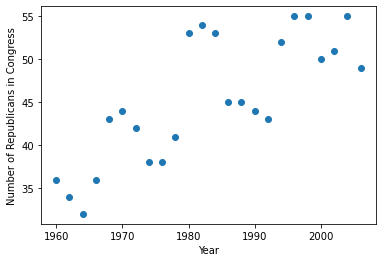

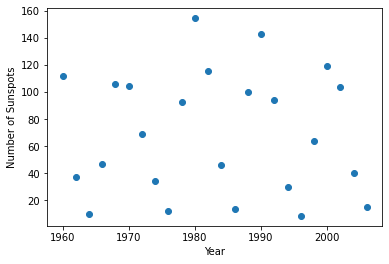

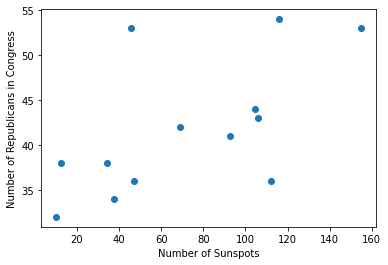

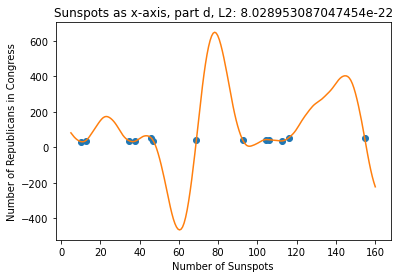

L2: 8.028953087047454e-22


In [27]:
#####################
# CS 181, Spring 2021
# Homework 1, Problem 4
# Start Code
##################

import csv
import numpy as np
import matplotlib.pyplot as plt

csv_filename = 'data/year-sunspots-republicans.csv'
years  = []
republican_counts = []
sunspot_counts = []

with open(csv_filename, 'r') as csv_fh:

    # Parse as a CSV file.
    reader = csv.reader(csv_fh)

    # Skip the header line.
    next(reader, None)

    # Loop over the file.
    for row in reader:

        # Store the data.
        years.append(float(row[0]))
        sunspot_counts.append(float(row[1]))
        republican_counts.append(float(row[2]))

# Turn the data into numpy arrays.
years  = np.array(years)
republican_counts = np.array(republican_counts)
sunspot_counts = np.array(sunspot_counts)
last_year = 1985

# Plot the data.
plt.figure(1)
plt.plot(years, republican_counts, 'o')
plt.xlabel("Year")
plt.ylabel("Number of Republicans in Congress")
plt.figure(2)
plt.plot(years, sunspot_counts, 'o')
plt.xlabel("Year")
plt.ylabel("Number of Sunspots")
plt.figure(3)
plt.plot(sunspot_counts[years<last_year], republican_counts[years<last_year], 'o')
plt.xlabel("Number of Sunspots")
plt.ylabel("Number of Republicans in Congress")
plt.show()

# Create the simplest basis, with just the time and an offset.
X = np.vstack((np.ones(years.shape), years)).T



# TODO: basis functions
# Based on the letter input for part ('a','b','c','d'), output numpy arrays for the bases.
# The shape of arrays you return should be: (a) 24x6, (b) 24x12, (c) 24x6, (c) 24x26
# xx is the input of years (or any variable you want to turn into the appropriate basis).
# is_years is a Boolean variable which indicates whether or not the input variable is
# years; if so, is_years should be True, and if the input varible is sunspots, is_years
# should be false
def make_basis(xx,part='a',is_years=True):
#DO NOT CHANGE LINES 65-69
    if part == 'a' and is_years:
        xx = (xx - np.array([1960]*len(xx)))/40
        N=xx.shape[0]
        X=np.zeros([N,6])
        for i in range(0,N):
            for j in range(0,6):
                X[i][j]=xx[i]**j
        
        
        
        
        
    if part == "a" and not is_years:
        xx = xx/20
        N=xx.shape[0]
        X=np.zeros([N,6])
        for i in range(0,N):
            for j in range(0,6):
                X[i][j]=xx[i]**j
                
                
    if part =="b" and is_years:
        #xx = (xx - np.array([1960]*len(xx)))/40
        N=xx.shape[0]
        Nyear=int((2010-1960)/5+1)
        
        X=np.ones([N,Nyear+1])
        for i in range(0,N):
            for j in range(1,Nyear+1):
                
                X[i][j]=np.exp(-(xx[i]-(1960+(j-1)*5))**2/25)
         

    if part =="c":
        #xx = (xx - np.array([1960]*len(xx)))/40
        N=xx.shape[0]
        
        X=np.ones([N,6])
        for i in range(0,N):
            for j in range(1,6):
                X[i][j]=np.cos(xx[i]/j)
                

                
    if part =="d":
        #xx = (xx - np.array([1960]*len(xx)))/40
        N=xx.shape[0]
        
        X=np.ones([N,26])
        for i in range(0,N):
            for j in range(1,26):
                X[i][j]=np.cos(xx[i]/j)
        
    return X



# Find the regression weights using the Moore-Penrose pseudoinverse.
def find_weights(X,Y):
    w = np.dot(np.linalg.pinv(np.dot(X.T, X)), np.dot(X.T, Y))
    return w

part='d'
is_years=False

if is_years:
    X=make_basis(years,part,is_years)
    # Nothing fancy for outputs.
    Y = republican_counts
else:
    X=make_basis(sunspot_counts[years<last_year],part,is_years)
    Y= republican_counts[years<last_year]


w=find_weights(X,Y)
Yhat=np.dot(X, w)
# Compute the regression line on a grid of inputs.
# DO NOT CHANGE grid_years!!!!!
grid_years = np.linspace(1960, 2005, 200)
grid_sunspots= np.linspace(5, 160, 200)

#grid_X = np.vstack((np.ones(grid_years.shape), grid_years))
if is_years:
    grid_X=make_basis(grid_years,part,is_years)
else:
    grid_X=make_basis(grid_sunspots,part,is_years)

grid_Yhat  = np.dot(grid_X, w) 

# TODO: plot and report sum of squared error for each basis

# Plot the data and the regression line.
if (is_years):
    title='Year as x-axis, part '+str(part)+', L2: ' + str(sum((Y - Yhat) ** 2))
else:
    title='Sunspots as x-axis, part '+str(part)+', L2: ' + str(sum((Y - Yhat) ** 2))
plt.title(title)
if (is_years):
    plt.plot(years, republican_counts, 'o', grid_years, grid_Yhat, '-')
else:
    plt.plot(sunspot_counts[years<last_year], republican_counts[years<last_year], 'o', grid_sunspots, grid_Yhat, '-')
if(is_years):
    plt.xlabel("Year")
else:
    plt.xlabel("Number of Sunspots")
    
plt.ylabel("Number of Republicans in Congress")
if (is_years):
    plt.savefig('Year as x-axis, part '+str(part)+'.png')
else:
    plt.savefig('Sunspots as x-axis, part '+str(part)+'.png')
plt.show()


print('L2: ' + str(sum((Y - Yhat) ** 2)))
